In [0]:
import pandas as pd


In [14]:
old = pd.read_csv('flooding_311_Houston.csv')
old.tail()

,"weight|""lat""|""lon""|""Location""|Create Date|Closed Date|Due Date|CaseType|Case Number"
1|30.07892496|-95.20258109|2927 TWIN KNOLLS,HOUSTON TX 77339|2019-11-16 18:58:02.943|2019...
1|||Intersection 0 MAIN ST&9052 S SAM HOUSTON PKWY W|2019-06-25 15:42:57.837|2019-06-25 15:59:31.677|2019-06-29 15:42:57.000|Flooding| 101003545567,NaN
1|29.75989828|-95.36705705|611 WALKER,HOUSTON TX 77002|2019-08-29 09:31:21.413|2019...
1|29.69336654|-95.28411751|3216 AUBURN,HOUSTON TX 77017|2019-10-01 14:31:34.790|2019...
1|29.85940752|-95.37630474|Intersection 10700 CLARK RD&200 PARKER RD|2019-09-19 11:46:38.853|2019-09-20 11:04:26.897|2019-09-23 11:46:38.000|Flooding| 101003649913,NaN


In [0]:
import pandas as pd
import numpy as np
import csv

In [0]:
with open('flooding_311_Houston.csv', newline='') as csvfile:
    weight = []
    xCor = []
    yCor = []
    location = []
    createDate = []
    closedDate = []
    dueDate = []
    caseType = []
    caseNumber = []
    spamreader = csv.reader(csvfile, delimiter='|', quotechar='|')
    it = 0
    it1 = 0
    allcol = []
    rowsError = []
    number = []
    for row in spamreader:
        it = it +1
        #print(it)
        #print(', '.join(row))
        #print(len(row))
        if(len(row) == 9):
            #print(row[1])
            it1 = it1 + 1
            #allcol.append(row[i])
            weight.append(row[0])
            xCor.append(row[1])
            yCor.append(row[2])
            location.append(row[3])
            createDate.append(row[4])
            closedDate.append(row[5])
            dueDate.append(row[6])
            caseType.append(row[7])
            caseNumber.append(row[8])
        else:
            number.append(it)
            rowsError.append(row )
            
            # else:
            #     #print('null')
            #     weight.append('null')
            #     xCor.append('null')
            #     yCor.append('null')
            #     location.append('null')
            #     createDate.append('null')
            #     closedDate.append('null')
            #     dueDate.append('null')
            #     caseType.append('null')
            #     caseNumber.append('null')

In [0]:
data =[weight, xCor,yCor,location,createDate, closedDate,dueDate, caseType,caseNumber]


In [21]:
newdf = pd.DataFrame({'Weight' : weight, 'Lattitude' : xCor,'Longitude' : yCor, 'Location' :location,
                     'Create Date' : createDate, 'Closed Date' : closedDate, 'Due Date' : dueDate,
                     'Case Type' : caseType, 'Case Number' : caseNumber})

newdf.head()

,Weight,Lattitude,Longitude,Location,Create Date,Closed Date,Due Date,Case Type,Case Number
0,"""weight""","""lat""","""lon""","""Location""",Create Date,Closed Date,Due Date,CaseType,Case Number
1,1,30.08308216,-95.16932057,"3014 BROOK SHORE, HOUSTON TX 77345",2019-10-02 17:27:26.947,2019-10-09 12:32:35.443,2019-10-06 17:27:26.000,Flooding,101003671007
2,1,29.81316778,-95.45494586,"2811 HELBERG, HOUSTON TX 77092",2019-09-25 09:17:39.560,2019-09-26 10:44:25.517,2019-09-29 09:17:39.000,Flooding,101003659951
3,1,30.07366757,-95.15979873,"6218 RIVERCHASE, HOUSTON TX 77345",2019-09-19 19:36:21.587,2019-09-23 12:44:25.433,2019-09-23 19:36:21.000,Flooding,101003650823
4,1,29.8438371,-95.33688501,"3225 WIMBERLY, HOUSTON TX 77093",2019-09-19 11:35:11.263,2019-09-20 16:24:25.833,2019-09-23 11:35:11.000,Flooding,101003649882


In [22]:
newdf1 = newdf.iloc[1:]
newdf1.head()

,Weight,Lattitude,Longitude,Location,Create Date,Closed Date,Due Date,Case Type,Case Number
1,1,30.08308216,-95.16932057,"3014 BROOK SHORE, HOUSTON TX 77345",2019-10-02 17:27:26.947,2019-10-09 12:32:35.443,2019-10-06 17:27:26.000,Flooding,101003671007
2,1,29.81316778,-95.45494586,"2811 HELBERG, HOUSTON TX 77092",2019-09-25 09:17:39.560,2019-09-26 10:44:25.517,2019-09-29 09:17:39.000,Flooding,101003659951
3,1,30.07366757,-95.15979873,"6218 RIVERCHASE, HOUSTON TX 77345",2019-09-19 19:36:21.587,2019-09-23 12:44:25.433,2019-09-23 19:36:21.000,Flooding,101003650823
4,1,29.8438371,-95.33688501,"3225 WIMBERLY, HOUSTON TX 77093",2019-09-19 11:35:11.263,2019-09-20 16:24:25.833,2019-09-23 11:35:11.000,Flooding,101003649882
5,1,30.06205131,-95.15821492,"5930 SPRING LODGE, HOUSTON TX 77345",2019-09-23 17:04:58.837,2019-09-24 11:24:26.920,2019-09-27 17:04:58.000,Flooding,101003656670


In [0]:
xCor1 = []
yCor1 = []
xCor1 = newdf1['Lattitude'].values
yCor1 = newdf1['Longitude'].values

In [0]:
xCor1 = np.asarray(xCor1)
yCor1 = np.asarray(yCor1)

In [35]:
newdf1['Lattitude'].head()

1    30.083082
2    29.813168
3    30.073668
4    29.843837
5    30.062051
Name: Lattitude, dtype: float64

In [0]:
!pip install geopandas # Work with geometry in Pandas dataframes
!pip install descartes # Helps geopandas plot polygons
!pip install pysal # Map classifiers for choropleth maps
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master

In [0]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [40]:
!SHAPE_RESTORE_SHX=YES fio info Work10.shp
streetMap = geopandas.read_file('Work10.shp')

{"driver": "ESRI Shapefile", "schema": {"properties": {}, "geometry": "Polygon"}, "crs": "", "crs_wkt": "", "bounds": [-95.96073299999999, 29.497339, -94.908492, 30.170606], "name": "Work10", "count": 112035}


In [0]:
geometry = [Point(xy) for xy in zip(newdf1['Longitude'],newdf1['Lattitude'])]

In [37]:
geometry[:3]

In [38]:
crs = {'init':'epsg:4326'}
geo_df = geopandas.GeoDataFrame(newdf1, crs=crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Weight,Lattitude,Longitude,Location,Create Date,Closed Date,Due Date,Case Type,Case Number,geometry
1,1,30.083082,-95.169321,"3014 BROOK SHORE, HOUSTON TX 77345",2019-10-02 17:27:26.947,2019-10-09 12:32:35.443,2019-10-06 17:27:26.000,Flooding,101003671007,POINT (-95.16932 30.08308)
2,1,29.813168,-95.454946,"2811 HELBERG, HOUSTON TX 77092",2019-09-25 09:17:39.560,2019-09-26 10:44:25.517,2019-09-29 09:17:39.000,Flooding,101003659951,POINT (-95.45495 29.81317)
3,1,30.073668,-95.159799,"6218 RIVERCHASE, HOUSTON TX 77345",2019-09-19 19:36:21.587,2019-09-23 12:44:25.433,2019-09-23 19:36:21.000,Flooding,101003650823,POINT (-95.15980 30.07367)
4,1,29.843837,-95.336885,"3225 WIMBERLY, HOUSTON TX 77093",2019-09-19 11:35:11.263,2019-09-20 16:24:25.833,2019-09-23 11:35:11.000,Flooding,101003649882,POINT (-95.33689 29.84384)
5,1,30.062051,-95.158215,"5930 SPRING LODGE, HOUSTON TX 77345",2019-09-23 17:04:58.837,2019-09-24 11:24:26.920,2019-09-27 17:04:58.000,Flooding,101003656670,POINT (-95.15821 30.06205)


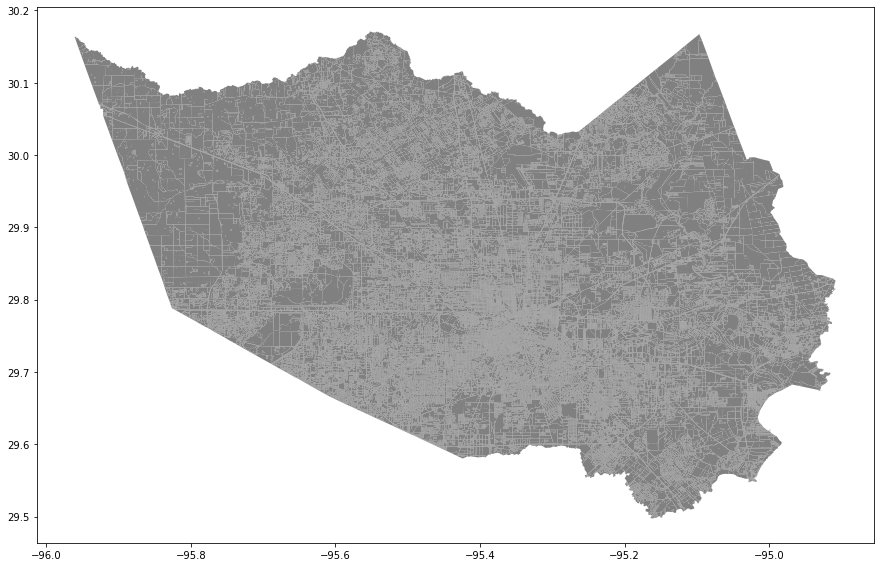

In [43]:
fig,ax = plt.subplots(figsize = (15,15))
streetMap.plot(ax = ax, color = 'grey')

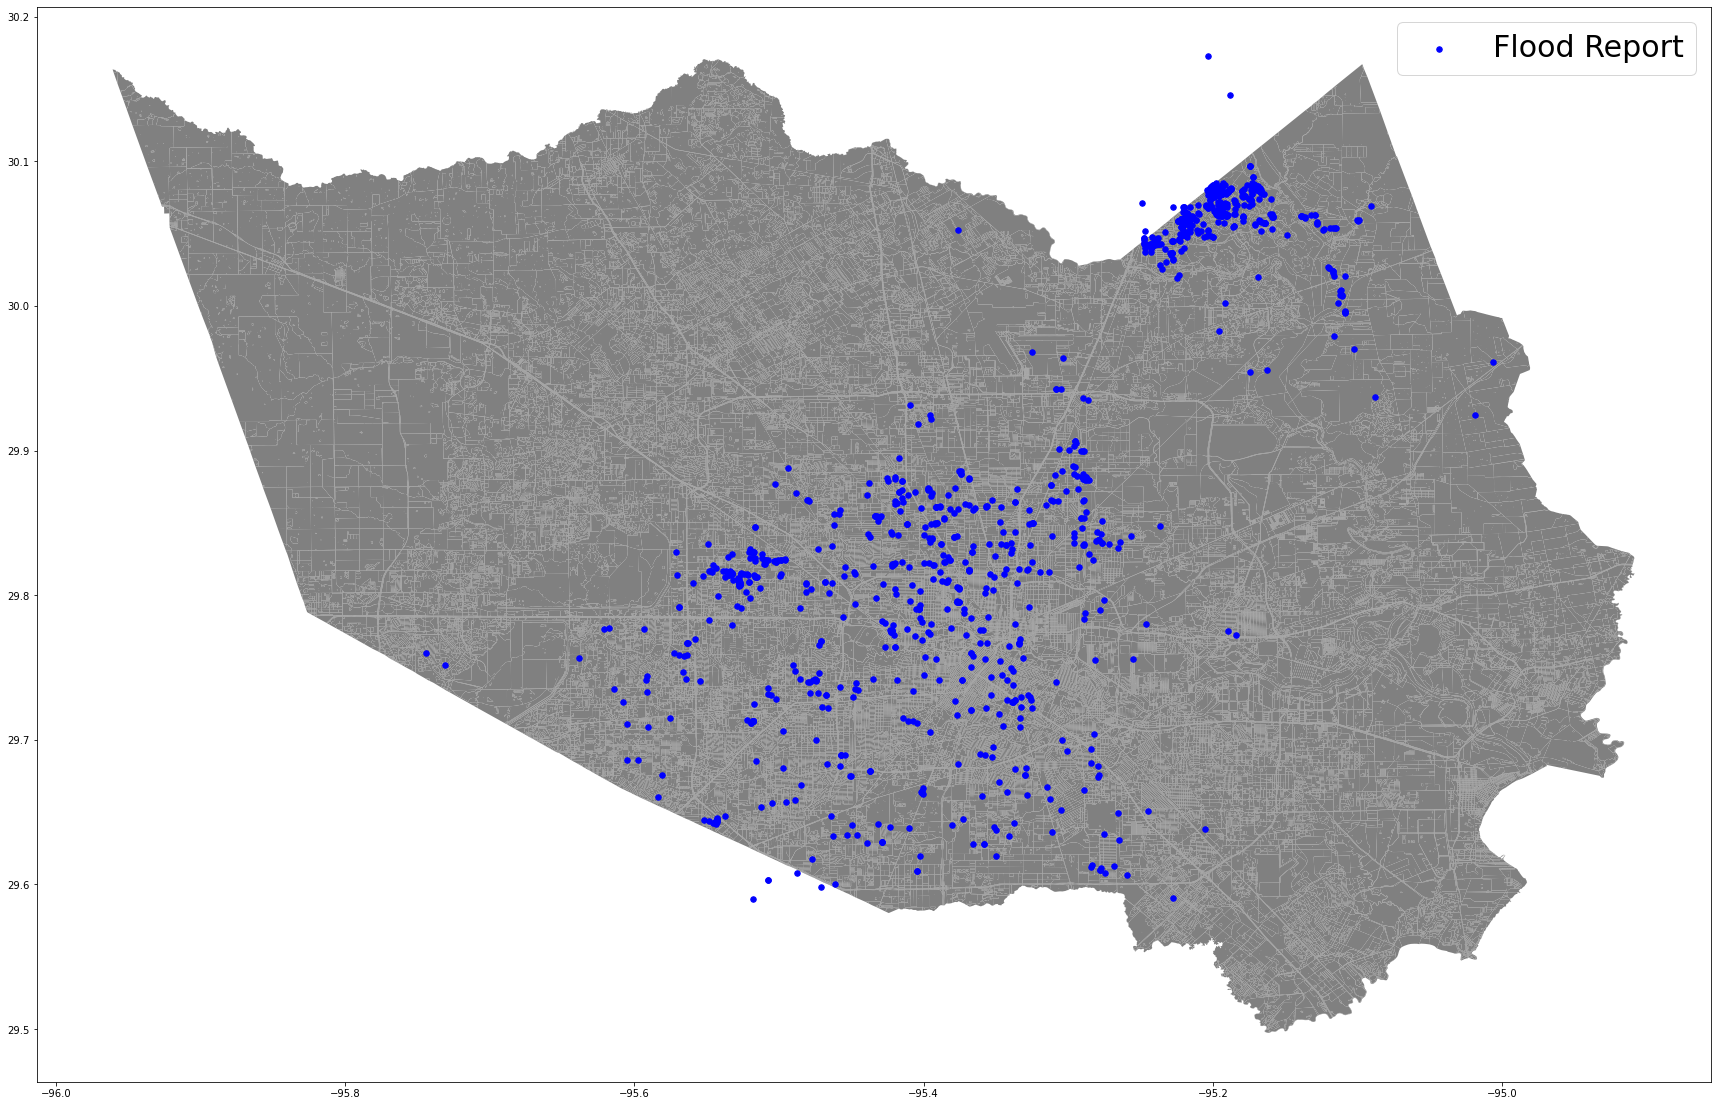

In [44]:
fig,ax = plt.subplots(figsize = (30,30))

streetMap.plot(ax = ax , color ='grey' )
geo_df[geo_df['Case Type'] == "Flooding" ].plot(ax = ax, markersize = 30, color = 'blue', marker = 'o', label= 'Flood Report' )
plt.legend(prop = {'size' : 30})

In [25]:
rowsError [:3] #data is missing here

[['1',
  'Intersection 0 MEMORIAL SERVICE RD&16 SHEPHERD DR',
  '2019-09-19 11:09:24.587',
  '2019-09-20 09:24:26.850',
  '2019-09-23 11:09:24.000',
  'Flooding',
  '        101003649801'],
 ['1',
  'Intersection 5800 W FUQUA ST & 6290 S SAM HOUSTON PKWY W',
  '2019-11-07 20:09:02.987',
  '2019-11-08 12:27:23.397',
  '2019-11-11 20:09:02.000',
  'Flooding',
  '        101003712883'],
 ['1',
  'Intersection 4700 BEECHNUT ST&8500 W LOOP FWY S',
  '2019-06-05 15:13:02.010',
  '2019-06-06 10:14:32.887',
  '2019-06-09 15:13:01.000',
  'Flooding',
  '        101003518778']]

In [26]:
number[:3] # the line number is excel with the missing data is here

[102, 131, 137]